# WeRateDogs推特数据的分析
## 收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import tweepy
import json
from io import StringIO

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# 通过csv文件获取主要的tweet信息
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 查看获取的数据
dog_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# 从链接获取tweet图形预测信息
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
text = response.content
# 链接内容转换为字符串并写入tsv文件
text_str = str(text, 'utf-8')
with open('image-predictions.tsv', 'w') as outfile:
    outfile.write(text_str)
# 将tsv文件读取为DataFrame
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# 查看图形预测数据
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# 获取额外的tweet信息

# 读取json文件方式一
# # 创建额外信息列表
# addition_columns = ['id_str', 
#                     'retweet_count', 
#                     'favorite_count']

# # 创建空DataFrame存放额外信息
# addition_data = pd.DataFrame(data=None, columns=addition_columns)
# # 读取json文件信息至DataFrame
# with open('tweet_json.txt', 'r') as infile:
#     text = infile.readline()
#     index = 0
#     while text:
#         # 将json数据转换为python dict
#         data_dict = json.loads(text)
#         for column in addition_columns:
#             addition_data.loc[index, column] = data_dict[column]
#         index += 1
#         text = infile.readline()

# 读取json文件方式二
# pd.read_json的方式
addition_data = pd.read_json('tweet_json.txt', lines=True)[['id_str', 'retweet_count', 'favorite_count']]
addition_data.columns = ['tweet_id', 'retweet_count', 'favorite_count']

In [7]:
addition_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336192,8842,39492
1,892177421306343424,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 评估
### 目测评估

In [8]:
# 显示tweet主要数据
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`dog_archive`共2356行*17列，各列包括：

**tweet_id**：这个推特的id

**in_reply_to_status_id**：回复状态的id

**in_reply_to_user_id**: 回复用户的id

**timestamp**：发推特的时间

**source**：推特的来源，包含设备类型等

**text**：发出推特的文本

**retweeted_status_id**：转发推特状态的id

**retweeted_status_user_id**：转发推特用户的id

**retweeted_status_timestamp**：转发推特状态的时间戳

**expanded_urls**：推特的链接

**rating_numerator**：评分的分子

**rating_denomenator**：评分的分母

**name**：狗的名字

**doggo, floofer, pupper, puppo**：狗狗的地位

In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


`dog_archive`共2075行*12列，比dog_archive少几行，可能是因为部分tweet没有图片

各列包括：

**tweet_id**：这个推特的id

**jpg_url**：图片的链接

**img_num**: 最可信的预测结果对应的图像编号

**p1**：是算法对推特中图片的一号预测

**p1_conf**：是算法的一号预测的可信度

**p1_dog**：是一号预测该图片是否属于“狗”

**p2**：是算法对推特中图片的二号预测

**p2_conf**：是算法的二号预测的可信度

**p2_dog**：是二号预测该图片是否属于“狗”

**p3**：是算法对推特中图片的三号预测

**p3_conf**：是算法的三号预测的可信度

**p3_dog**：是三号预测该图片是否属于“狗”


In [10]:
addition_data

,tweet_id,retweet_count,favorite_count
0,892420643555336192,8842,39492
1,892177421306343424,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991424,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198848,7684,32467


`addition_data`共2352行*3列，比dog_archive少几行，可能是因为部分tweet没有转发

各列包括：

**tweet_id**：这个推特的id

**retweeted_count**：转发数量

**favorite_count**: 喜爱数量

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

#### dog_archive数据

In [11]:
# 查看dog_archive所有列
dog_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
dog_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
# 查看dog_archive info
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# 查看描述性统计特性
dog_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# 查看tweet_id是否有重复值
dog_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [16]:
# 评分的分子的计数
dog_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# 评分分子的排序
dog_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

可以把评分超过15的都拉出来单独看一下

In [18]:
dog_archive[dog_archive.rating_numerator>17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


看不出端倪，拉出评分和text单独查看

In [19]:
# 通过print的方式查看完整text和rating
dog_archive_part = dog_archive[dog_archive.rating_numerator>15]
part_len = len(dog_archive_part)
for i in dog_archive_part.index.values:
    print('{:<5}{:<4}{:<4}{}\n'.format(i,dog_archive_part.loc[i]['rating_numerator'], 
                                dog_archive_part.loc[i]['rating_denominator'],
                                dog_archive_part.loc[i]['text']))

55   17  10  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s

188  420 10  @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research

189  666 10  @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10

290  182 10  @markhoppus 182/10

313  960 0   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

340  75  10  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…

433  84  70  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

516  24  7   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

695  75  10  This is Logan, the Chow who lived. 

发现一个读取错误的评分960/0

In [20]:
# 评分分母的计数
dog_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# 评分分母不等于10的数据
dog_archive[dog_archive.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [22]:
# 打印出评分分母不等于10的更多信息
dog_archive_part = dog_archive[dog_archive.rating_denominator!=10]
index_arr = dog_archive_part.index.values
for index in index_arr:
    print('{:<5}{:<4}{:<4}{}\n'.format(index,dog_archive_part.loc[index]['rating_numerator'], 
                                dog_archive_part.loc[index]['rating_denominator'],
                                dog_archive_part.loc[index]['text']))

313  960 0   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

342  11  15  @docmisterio account started on 11/15/15

433  84  70  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

516  24  7   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

784  9   11  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

902  165 150 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

1068 9   11  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

1120 204 170 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3x

一种更便捷的查看完整text内容的方式

In [23]:
# 设置pandas option实现查看完整text内容
pd.set_option('max_colwidth', 200)
# 显示text列和评分列
dog_archive.query('rating_numerator > 20 | rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


接下来查看转发和回复推特的情况

In [24]:
dog_archive[dog_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

In [25]:
# 转发推特的数量
retweeted_num = sum(dog_archive.retweeted_status_id.notnull())
print('转发推特的数量：{}'.format(retweeted_num))

转发推特的数量：181


In [26]:
# 回复推特的数量
reply_num = sum(dog_archive.in_reply_to_status_id.notnull())
print('回复推特的数量：{}'.format(reply_num))

回复推特的数量：78


In [27]:
# 创建回复自己的推特的id_list
tweet_id_arr = dog_archive.tweet_id.values
in_reply_status_id_arr = dog_archive[dog_archive.in_reply_to_status_id.notnull()].in_reply_to_status_id.values
# 存放回复自己的推特的id
id_list = []
# index_list = []
for status_id in in_reply_status_id_arr:
    status_id = int(status_id)
    if status_id in tweet_id_arr:
        id_list.append(status_id)

In [28]:
# 查看回复自己的推特的数量
print('回复自己的推特数量: {}'.format(len(id_list)))

回复自己的推特数量: 33


In [29]:
# 查看回复自己的推特的原始推特和回复推特的时间和内容
for tweet_id in id_list:
    original_tweet_time = dog_archive[dog_archive.tweet_id==tweet_id].iloc[0]['timestamp']
    original_tweet_text = dog_archive[dog_archive.tweet_id==tweet_id].iloc[0]['text']
    reply_tweet_time = dog_archive[dog_archive.in_reply_to_status_id==tweet_id].iloc[0]['timestamp']
    reply_tweet_text = dog_archive[dog_archive.in_reply_to_status_id==tweet_id].iloc[0]['text']
    print('original_tweet_time: {}\noriginal_tweet_text: {}\nreply_tweet_time: {}\nreply_tweet_text: {}\n'.format(
          original_tweet_time,original_tweet_text,reply_tweet_time,reply_tweet_text))

original_tweet_time: 2017-04-22 16:18:34 +0000
original_tweet_text: I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth
reply_tweet_time: 2017-04-24 15:13:52 +0000
reply_tweet_text: THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA

original_tweet_time: 2017-04-01 16:35:01 +0000
original_tweet_text: This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
reply_tweet_time: 2017-04-01 16:41:12 +0000
reply_tweet_text: Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet

original_tweet_time: 2016-07-29 18:53:24 +0000
original_tweet_text: Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good loo

从上述回复推特的内容时间可以看出，部分推特的评分并不是对狗的评分，还存在对同一只狗的重复评分

In [30]:
# 查看评分分子缺失的数量
rating_numerator_null = sum(dog_archive.rating_numerator.isnull())
print('评分分子缺失的数量:{}'.format(rating_numerator_null))

评分分子缺失的数量:0


In [31]:
# 查看评分分母缺失的数量
rating_denominator_null = sum(dog_archive.rating_denominator.isnull())
print('评分分母缺失的数量:{}'.format(rating_denominator_null))

评分分母缺失的数量:0


查看name列的计数

In [32]:
dog_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Bailey            7
Buddy             7
an                7
Toby              7
Rusty             6
Jack              6
Milo              6
Oscar             6
Stanley           6
Koda              6
Dave              6
Leo               6
Jax               6
Scout             6
Bella             6
Louis             5
               ... 
Halo              1
Shawwn            1
Kulet             1
Petrick           1
Bobby             1
Jeffri            1
Lucky             1
Darby             1
Wesley            1
Pip               1
Anna              1
Emma              1
Dylan             1
by                1
Eevee             1
Josep             1
Mingus            1
Furzey            1
Alexanderson      1


发现a, an, the 等错误的宠物狗name

In [33]:
# 查看name列全部小写的数据
dog_archive[dog_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

发现name列的错误不仅仅局限在a, an, the， 还有其他全为小写的单词，所以可以认为name列全为小写的单词均为错误数据

#### image_pred数据

In [34]:
# 查看图片数据前几行
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
# 查看图片数据概略信息
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


可以看出图片数据没有缺失值

In [36]:
# 查看图片数据描述统计数据
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
# 查看tweet_id列是否有重复值
sum(image_pred.tweet_id.duplicated())

0

In [38]:
# 查看图片链接是否有重复值
sum(image_pred.jpg_url.duplicated())

66

确实出现66个图片链接的重复数据，可能是回复自己的推特或转发自己的推特引用了相同的图片

In [39]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [40]:
# 查看图片数量分布情况
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [41]:
# 查看预测狗类型结果
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [42]:
# 查看p1预测是否为狗的比例
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [43]:
# 查看p2预测是否为狗的比例
image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [44]:
# 查看p3预测是否为狗的比例
image_pred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [45]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
649,681891461017812993,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,1,Chihuahua,0.203570,True,doormat,0.134316,False,toy_terrier,0.084482,True
1888,848212111729840128,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False
1203,741438259667034112,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,1,Chesapeake_Bay_retriever,0.292675,True,redbone,0.197858,True,vizsla,0.150312,True
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True


可以看出，一般一号预测的可信度最高，如果一号预测是狗我们认为图片中就是狗，那么二号、三号预测的数据就可以删除

#### addition_data数据

In [46]:
# 查看addtion_data的前几列数据
addition_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336192,8842,39492
1,892177421306343424,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [47]:
# 查看addtion_data.info()
addition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [48]:
# chak additoin_data的描述统计数据
addition_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [49]:
# 查看addition_data中tweet_id是否有重复值
sum(addition_data.tweet_id.duplicated())

0

In [50]:
# 查看数据类型
addition_data.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [51]:
# 查看retweet_count列是否为int类型
pd.api.types.is_integer_dtype(addition_data['retweet_count'])

True

#### 质量
##### `dog_archive` 表格
- tweet_id列数据为int类型，而不是string类型
- timestamp列数据格式为string，而不是datatime类型
- in_reply_to_status_id、in_reply_to_user_id列数据为float类型，显示时总是科学计数，修改为string类型
- retweeted_status_id、retweeted_status_user_id列数据为float，显示时总是科学计数，修改为string类型
- retweeted_status_timestamp列数据为string，而不是datatime类型
- index为313的rating为960/0，实际应为13/10
- index为342的推特不是关于dog评分的
- index为1068的评分为9/11，实际应为14/10
- index为1165的评分为4/20，实际为13/10
- index为1202的评分为50/50，实际为11/10
- index为1662的评分为7/11，实际为10/19
- index为2335的评分为1/2，实际为9/10
- 不需要转发的评级，删除转发的数据
- 回复自己的推特，删除日期靠前的
- name列存在全为小写的无效的宠物狗名称
- 删除没有图片的推特行，即image_pred数据集中没有而dog_archive数据集中有的数据需要删除

##### `image_pred` 表格
- tweet_id列数据为int类型，而不是string类型
- 删除p2, p3预测数据
- 部分评分不是给狗的，和image_pred合并后，删除图片预测不是狗的数据

##### `addition_data` 表格
- tweet_id列为int类型数据，而不是string类型


#### 整洁度
- `dog_archive`描述dog等级的4列合并为1列，均属于dogtionary属性
- `dog_archive`描述dog评分的2列合并为1列
- `image_pred`保留tweet_id, jpg_url, is_dog这三列，dog的p1/p2/p3预测都是是否为dog的预测及可信程度的数据，is_dog由p1_dog/p2_dog/p3_dog这三列取或，即只要有一个预测为dog，is_dog就为true
- 三个数据都是推特对象的观察结果，可以以tweet_id合并为一个数据表



## 清理

In [52]:
# 备份三个数据集
dog_archive_clean = dog_archive.copy()
image_pred_clean = image_pred.copy()
addition_data_clean = addition_data.copy()

#### 质量

#### dog_archive, image_pred, addition_data的tweet_id列的列名称和数据类型不完全一致

##### 定义
修改dog_archive, image_pred的tweet_id列的数据类型为string，修改addition_data的id_str列名称为tweet_id

##### 代码

In [53]:
# 修改tweet_id数据类型
dog_archive_clean.tweet_id = dog_archive_clean.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)
addition_data_clean.tweet_id = addition_data_clean.tweet_id.astype(str)
# # 修改id_str列名称
# addition_data_clean.rename(columns={'id_str': 'tweet_id'}, inplace=True)

##### 测试

In [54]:
# 抽样tweet_id查看数据类型
type(dog_archive_clean.tweet_id[0])

str

In [55]:
# 抽样tweet_id查看数据类型
type(image_pred_clean.tweet_id[0])

str

In [56]:
# 查看tweet_id查看数据类型
pd.api.types.is_string_dtype(addition_data_clean.tweet_id)

True

#### dog_archive表修改错误评分值，及删除不是dog评分的推特数据

##### 定义
- index为342的推特不是关于dog评分的，删除行
- 鉴于关于dog评分的错误值较多，重新从text列中提取dog评分

##### 代码

In [57]:
# 先验证
dog_archive_clean.iloc[342]['text']

'@docmisterio account started on 11/15/15'

In [58]:
# 后删除
dog_archive_clean.drop(index=342, inplace=True)

In [59]:
# 重新从text列读取分数
dog_archive_clean['last_score'] = \
    dog_archive_clean.text.str.findall('((?:\d+\.)?\d+/[1-9]+[0]+)').apply(lambda x: x[-1] if len(x)>0 else x)
rating = dog_archive_clean['last_score'].str.split('/', n=1, expand=True)
dog_archive_clean.rating_numerator = rating[0].astype(float)
dog_archive_clean['rating_denominator'] = rating[1].astype(float)

#### 测试

In [60]:
# 查看是否还有分母为零的rating
sum(dog_archive_clean.rating_denominator<1)

0

In [61]:
# 取出评分分母不等于10和分子大于20的数据查看
dog_archive_clean.query('rating_numerator>20 | rating_denominator!=10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,@markhoppus 182/10,182.0,10.0
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0


可以看出重新读取rating后，存在了缺失值，这里采取直接去掉缺失值的方式处理

In [62]:
# 原始数据长度
len_before = len(dog_archive_clean)

In [63]:
# 删除rating存在缺失值的行
dog_archive_clean.dropna(subset=['rating_numerator', 'rating_denominator'], inplace=True)

In [64]:
# 删除后数据长度
len_after = len(dog_archive_clean)
print('删除数据行数：{}'.format(len_before - len_after))

删除数据行数：2


In [65]:
# 查看rating存在缺失值的行
dog_archive_clean[dog_archive_clean.rating_numerator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,last_score


#### 整洁度

#### image_pred关于预测是否为dog的特征列太多

##### 定义
image_pred保留tweet_id, jpg_url, is_dog这三列，dog的p1/p2/p3预测都是是否为dog的预测及可信程度的数据，is_dog由p1_dog/p2_dog/p3_dog这三列取或，即只要有一个预测为dog，is_dog就为true

##### 代码

In [66]:
# 产生is_dog列
image_pred_clean['is_dog'] = image_pred_clean['p1_dog'] | image_pred_clean['p2_dog'] | image_pred_clean['p3_dog']
# 删除多余的列
image_pred_clean.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

#### 测试

In [67]:
# 查看是否成功创建is_dog列
image_pred_clean.head()

,tweet_id,jpg_url,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True


#### 整洁度

#### dog_archive评分存在两列，不符合一个属性为一列的整洁度要求

##### 定义

dog_archive表中，关于评分两列合并为一列，部分分数的分母不是为10，统一将分数转换为分母为10的基数，然后只保留分子。比如原分数为44/40，则处理后只保留11作为评分。
- 处理前，需要先将分母为零的数据，更换为正确的数据

##### 代码

In [68]:
# 创建rating列
dog_archive_clean['rating'] = dog_archive_clean['rating_numerator'] / dog_archive_clean['rating_denominator'] * 10
dog_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### 测试

In [69]:
# 查看dog_archive_clean所有的列
dog_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'last_score', 'rating'],
      dtype='object')

In [70]:
# 查看rating列的计数
dog_archive_clean.rating.value_counts()

12.00      561
11.00      472
10.00      455
13.00      355
9.00       157
8.00       104
14.00       56
7.00        56
5.00        34
6.00        33
3.00        19
4.00        16
2.00        11
1.00         9
0.00         2
15.00        2
420.00       2
9.75         2
11.26        1
9.50         1
11.27        1
666.00       1
13.50        1
1776.00      1
182.00       1
Name: rating, dtype: int64

#### dog_archive关于dog等级描述总共有4列，实际上属于同一个属性

##### 定义
dog_archive表中，描述dog等级的4列合并为1列，均命名dogtionary列

##### 代码

In [71]:
# 将None替换为空字符
dog_archive_clean.loc[:,['doggo','floofer', 'pupper', 'puppo']] = \
  dog_archive_clean.loc[:,['doggo','floofer', 'pupper', 'puppo']].replace('None', '')

In [72]:
# 字符串加法运算创建新的dogtionary列
dog_archive_clean['dogtionary'] = dog_archive_clean['doggo']+','+ dog_archive_clean['floofer']+','+\
    dog_archive_clean['pupper']+','+dog_archive_clean['puppo']
dog_archive_clean.dogtionary = dog_archive_clean.dogtionary.str.strip(',')
dog_archive_clean.dogtionary = dog_archive_clean.dogtionary.str.replace(',+', ',')
dog_archive_clean.dogtionary.replace('', np.nan, inplace=True)
# 删除原'doggo','floofer', 'pupper', 'puppo'四列
dog_archive_clean.drop(columns=['doggo','floofer', 'pupper', 'puppo'], inplace=True)

#### 测试

In [73]:
# 采样查看是否删除'doggo','floofer', 'pupper', 'puppo'四列，创建dogtionary列
dog_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,last_score,rating,dogtionary
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,http...",None,11/10,11.0,doggo
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1",Zeus,12/10,12.0,NaN
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929667219457/photo/1,None,11/10,11.0,NaN
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019896193024/photo/1,None,9/10,9.0,NaN
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Shadow. She's tired of the responsibilities associated with being a dog. No longer strives to attain ball. 9/10 https://t.co/cdOkfEpjFw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897839910912/video/1,Shadow,9/10,9.0,NaN


In [74]:
# 查看dogtionary列是否去掉多余的逗号
dog_archive_clean[dog_archive_clean.dogtionary.str.contains(',+')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,last_score,rating,dogtionary
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,13/10,13.0,"doggo,puppo"
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,11/10,11.0,"doggo,floofer"
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,13/10,13.0,"doggo,pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,None,12/10,12.0,"doggo,pupper"
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,None,11/10,11.0,"doggo,pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",Bones,12/10,12.0,"doggo,pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",Pinot,10/10,10.0,"doggo,pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,None,12/10,12.0,"doggo,pupper"
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",None,12/10,12.0,"doggo,pupper"
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.

In [75]:
# 查看dogtionary是否还有空字符
dog_archive_clean.dogtionary.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dogtionary, dtype: int64

#### 三个表都是针对推特对象的观察结果，可以合并为一个表

##### 定义
三个表dog_archive, addition_data和image_pred根据tweet_id合并到一个表里

合并时删除没有图片的数据

##### 代码

In [76]:
# merge表格,采用inner的方式删除没有图片的数据
dog_archive_clean = dog_archive_clean.merge(image_pred_clean, how='inner', on='tweet_id')
dog_archive_clean = dog_archive_clean.merge(addition_data_clean, how='left', on='tweet_id')

#### 测试

In [77]:
# 查看合并至dog_archive_clean后的列
dog_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'last_score',
       'rating', 'dogtionary', 'jpg_url', 'is_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [78]:
# 确认删除了没有图片的数据
sum(dog_archive_clean.jpg_url.isnull())

0

#### 质量

#### 部分数据为时间的列，其数据类型为string

##### 定义
dog_archive表格timestamp和retweeted_status_timestamp列数据类型修改为datetime

##### 代码

In [79]:
# to_datetime修改时间数据类型
dog_archive_clean.timestamp = pd.to_datetime(dog_archive_clean.timestamp)
dog_archive_clean.retweeted_status_timestamp = pd.to_datetime(dog_archive_clean.retweeted_status_timestamp)

#### 测试

In [80]:
# 查看timestamp类型
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 18 columns):
tweet_id                      2074 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2074 non-null datetime64[ns]
source                        2074 non-null object
text                          2074 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2074 non-null object
name                          2074 non-null object
last_score                    2074 non-null object
rating                        2074 non-null float64
dogtionary                    321 non-null object
jpg_url                       2074 non-null object
is_dog                        2074 non-null bool
retweet_count                 1348 non-null float64
favorite_count   

#### in_reply_to_status_id，retweeted_status_id等id相关列显示为科学计数

##### 定义
dog_archive表格里in_reply_to_status_id、retweeted_status_id等id相关列为float类型，修改为string类型

##### 代码

In [81]:
# 修改in_reply_to_status_id列数据类型为string
dog_archive_clean.in_reply_to_status_id.fillna(0, inplace=True)
dog_archive_clean.in_reply_to_status_id = dog_archive_clean.in_reply_to_status_id.astype(int)
dog_archive_clean.in_reply_to_status_id = dog_archive_clean.in_reply_to_status_id.astype(str)
dog_archive_clean.in_reply_to_status_id.replace('0', 'None', inplace=True)
# 修改in_reply_to_status_id列数据类型为string
dog_archive_clean.in_reply_to_user_id.fillna(0, inplace=True)
dog_archive_clean.in_reply_to_user_id = dog_archive_clean.in_reply_to_user_id.astype(int)
dog_archive_clean.in_reply_to_user_id = dog_archive_clean.in_reply_to_user_id.astype(str)
dog_archive_clean.in_reply_to_user_id.replace('0', 'None', inplace=True)

In [82]:
# 修改retweeted_status_id列数据类型为string
dog_archive_clean.retweeted_status_id.fillna(0, inplace=True)
dog_archive_clean.retweeted_status_id = dog_archive_clean.retweeted_status_id.astype(int)
dog_archive_clean.retweeted_status_id = dog_archive_clean.retweeted_status_id.astype(str)
dog_archive_clean.retweeted_status_id.replace('0', 'None', inplace=True)
# 修改retweeted_status_user_id列数据类型为string
dog_archive_clean.retweeted_status_user_id.fillna(0, inplace=True)
dog_archive_clean.retweeted_status_user_id = dog_archive_clean.retweeted_status_user_id.astype(int)
dog_archive_clean.retweeted_status_user_id = dog_archive_clean.retweeted_status_user_id.astype(str)
dog_archive_clean.retweeted_status_user_id.replace('0', 'None', inplace=True)

#### 测试

In [83]:
# in_reply_to_status_id列
dog_archive_clean.in_reply_to_status_id[30]

'None'

In [84]:
# in_reply_to_status_id列
dog_archive_clean.in_reply_to_status_id[31]

'None'

In [85]:
# in_reply_to_user_id列
dog_archive_clean.in_reply_to_user_id[30]

'None'

In [86]:
# in_reply_to_user_id列
dog_archive_clean.in_reply_to_user_id[31]

'None'

In [87]:
# retweeted_status_id列
dog_archive_clean.retweeted_status_id[19]

'887473957103951872'

In [88]:
# retweeted_status_id列
dog_archive_clean.retweeted_status_id[18]

'None'

In [89]:
# retweeted_status_user_id列
dog_archive_clean.retweeted_status_user_id[19]

'4196983835'

In [90]:
# retweeted_status_user_id列
dog_archive_clean.retweeted_status_user_id[18]

'None'

#### 转发的推特相关的评分数据为多余数据

##### 定义
项目要求只需要含有图片的原始评级 (不包括转发)，那么删除转发的推特行，具体是删除retweeted_status_id不等于'None'的行

##### 代码

In [91]:
# 删除转发的推特数据
retweeted_index = dog_archive_clean[dog_archive_clean.retweeted_status_id!='None'].index.values
dog_archive_clean.drop(index=retweeted_index, inplace=True)

#### 测试

In [92]:
# 查看转发推特数量
sum(dog_archive_clean.retweeted_status_id!='None')

0

In [93]:
# 删除转发相关列
dog_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [94]:
dog_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'last_score', 'rating',
       'dogtionary', 'jpg_url', 'is_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

#### 部分推特为回复自己的状态，这部分可以删除原始推特，认为日期更新的推特的数据更有效

##### 定义
dog_archive表格删除in_reply_to_status_id为自己的推特的状态

##### 代码

In [95]:
# 之前的代码中创建了id_list变量，存放了被回复推特的tweet_id，这部分就是可以被删除的推特数据
# 将id_list中的tweet_id类型转换为string类型
id_str_list = map(str, id_list)
for tweet_id in id_str_list:
    dog_archive_clean = dog_archive_clean[dog_archive_clean.tweet_id!=tweet_id]

#### 测试

In [96]:
# 测试是否还有未被删除的被回复的原始推特
tweet_id_arr = dog_archive_clean.tweet_id.values
in_reply_to_status_id_arr = dog_archive_clean.in_reply_to_status_id.values
# 创建tweet_id_list存放原始推特id
tweet_id_list = []
for tweet_id in in_reply_status_id_arr:
    if tweet_id in tweet_id_arr:
        tweet_id_list.append(tweet_id)
print('被回复的原始推特数量：{}'.format(len(tweet_id_list)))

被回复的原始推特数量：0


#### 部分图片的预测显示图片不是狗，说明这些图片的评分不是针对狗的

##### 定义
合并后dog_archive中，删除图片预测不是狗的推特数据行

##### 代码

In [97]:
# 查看目前数据总量
len(dog_archive_clean)

1963

In [98]:
# 查看图片预测是狗的数量
sum(dog_archive_clean.is_dog==True)

1662

In [99]:
# 查看图片预测不是狗的数量
sum(dog_archive_clean.is_dog==False)

301

In [100]:
# 查看图片预测缺失的数量
sum(dog_archive_clean.is_dog.isnull())

0

2142 = 1663 + 201 + 178

In [101]:
# 删除图片预测不是狗的推特数据行
dog_archive_notdog = dog_archive_clean[dog_archive_clean.is_dog==False]
id_notdog_arr = dog_archive_notdog.index.values
dog_archive_clean.drop(index=id_notdog_arr, inplace=True)

##### 测试

In [102]:
# 查看预测不是狗的数据行数量
sum(dog_archive_clean.is_dog==False)

0

#### 图片链接列存在重复值

##### 定义
查看上述drop处理后，jpg_url是否还有重复值，如果有根据时间顺序，删除时间在前的数据行，保留时间更新的数据行

##### 代码

In [103]:
# 查看缺失值数量
sum(dog_archive_clean.jpg_url.isnull())

0

In [104]:
# 查看jpg_url列重复数量
sum(dog_archive_clean.jpg_url.duplicated())

0

可以看出缺失值比重复数量多1个，那么缺失的值就是统计的全部缺失值数量，所以不存在真正的缺失数据

#### name列存在大量小写狗名

##### 定义
将无效的狗名替换为np.nan

##### 代码

In [105]:
# 替换无效狗名
mask = (dog_archive_clean.name.str.islower())|(dog_archive_clean.name == 'None')
dog_archive_clean.loc[mask, 'name'] = np.nan

#### 测试

In [106]:
# 查看是否仍有小写的狗名
dog_archive_clean[dog_archive_clean.name.str.islower()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,last_score,rating,dogtionary,jpg_url,is_dog,retweet_count,favorite_count


### 存储清理后的主数据集

In [107]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
dog_archive_clean.to_csv('twitter_archive_master.csv', header=True, index=True)

## 分析和可视化

### 提出问题

**评分与dogtionary**
- 是否某一类狗的评分更容易获得高分
- 是否某一类狗的评分更容易获得低分

**评分与转发和点赞数量**
- 评分高低与转发数量的关系
- 评分高等与点赞数量的关系

**转发和点赞数量与dogtionary关系**
- 是否某一dogtionary的狗转发数量更高
- 是否某一dogtionary的狗点赞数量更高

**转发和点赞数量的关系**
- 转发数和点赞数的关系

#### 问题1
**评分与dogtionary**
- 是否某一类狗的评分更容易获得高分
- 是否某一类狗的评分更容易获得低分

In [109]:
# 提取出dogtionary不为None的数据
archive_part = dog_archive_clean[dog_archive_clean.dogtionary.notnull()]
# 获取不同dogtionary的数据
doggo_archive = archive_part[archive_part.dogtionary.str.contains('doggo')]
pupper_archive = archive_part[archive_part.dogtionary.str.contains('pupper')]
puppo_archive = archive_part[archive_part.dogtionary.str.contains('puppo')]
floofer_archive = archive_part[archive_part.dogtionary.str.contains('floofer')]

In [110]:
# 计算doggo类狗的评分描述型统计量
doggo_archive.describe()

,rating,retweet_count,favorite_count
count,62.000000,34.000000,34.000000
mean,11.838710,5350.411765,15620.500000
std,1.580553,8397.928100,18518.772406
min,5.000000,987.000000,3660.000000
25%,11.000000,1956.750000,6594.000000
50%,12.000000,2486.000000,9128.500000
75%,13.000000,3977.000000,12335.000000
max,14.000000,42045.000000,95138.000000


In [111]:
# 计算pupper类狗的评分描述型统计量
pupper_archive.describe()

,rating,retweet_count,favorite_count
count,174.000000,120.000000,120.000000
mean,10.857874,2225.783333,7022.000000
std,1.542384,2528.016332,7793.300403
min,4.000000,102.000000,687.000000
25%,10.000000,688.750000,2433.500000
50%,11.000000,1265.500000,3612.000000
75%,12.000000,2525.250000,8013.000000
max,14.000000,15743.000000,39558.000000


In [112]:
# 计算puppo类狗的评分描述型统计量
puppo_archive.describe()

,rating,retweet_count,favorite_count
count,22.000000,15.000000,15.000000
mean,12.000000,5234.000000,16755.800000
std,1.309307,6250.101108,16499.277414
min,9.000000,707.000000,3265.000000
25%,11.250000,1586.000000,6447.000000
50%,12.000000,3029.000000,10088.000000
75%,13.000000,4681.500000,18959.000000
max,14.000000,19563.000000,56199.000000


In [113]:
# 计算floofer类狗的评分描述型统计量
floofer_archive.describe()

,rating,retweet_count,favorite_count
count,8.000000,5.000000,5.000000
mean,11.875000,2513.800000,8133.600000
std,1.125992,1809.608576,6051.676156
min,10.000000,494.000000,2255.000000
25%,11.000000,1136.000000,4003.000000
50%,12.000000,2496.000000,6038.000000
75%,13.000000,3419.000000,11252.000000
max,13.000000,5024.000000,17120.000000


如果观察描述统计量的均值，可以发现这四类狗的评分非常接近，难以评价出哪一类狗更容易获得高分，只能说puppo狗获得的平均评分更高

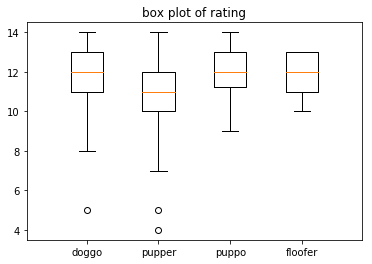

In [114]:
# 不同类型狗的评分单独存放为list
data = [doggo_archive.rating.values, pupper_archive.rating.values,
        puppo_archive.rating.values, floofer_archive.rating.values]
# 通过箱线图观察不同的狗的评分
fig,ax=plt.subplots(figsize=(6, 4))
ax.boxplot(data, positions=[0, 0.6, 1.2, 1.8])
ax.set_xticklabels(['doggo', 'pupper', 'puppo', 'floofer'])
ax.set_title('box plot of rating')
plt.show()

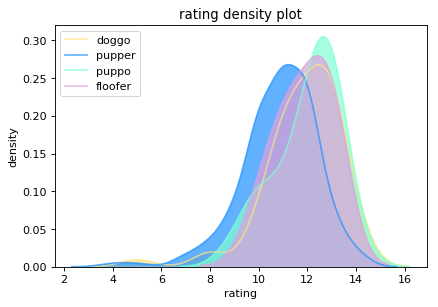

In [115]:
import seaborn as sns
plt.figure(figsize=(6,4), dpi= 80)
sns.kdeplot(doggo_archive.rating.values, shade=True, color="#FFE384", label="doggo", alpha=.7)
sns.kdeplot(pupper_archive.rating.values, shade=True, color="#1E90FF", label="pupper", alpha=.7)
sns.kdeplot(puppo_archive.rating.values, shade=True, color="#7FFFD4", label="puppo", alpha=.7)
sns.kdeplot(floofer_archive.rating.values, shade=True, color='#DDA0DD', label="floofer", alpha=.7)
plt.title('rating density plot')
plt.xlabel('rating')
plt.ylabel('density')
plt.show()

#### 结论1：

从箱线图和密度图来看：

- puppo的分数整体都比较高，而且分布也很集中，可以得出puppo类型的狗更容易获得高评分。
- pupper的分数分布比较宽，但整体来看分布比其他三种类型的狗分数低，可以得出pupper类型的狗更容易获得低评分。

#### 问题2

**评分与转发和点赞数量**
- 评分高低与转发数量的关系
- 评分高等与点赞数量的关系

In [116]:
# 准备数据
dog_archive_clean.retweet_count = dog_archive_clean.retweet_count.astype(float)
dog_archive_clean.favorite_count = dog_archive_clean.favorite_count.astype(float)
dog_archive_clean['retweet_count_log'] = np.log(dog_archive_clean['retweet_count']+1)
dog_archive_clean['favorite_count_log'] = np.log(dog_archive_clean['favorite_count']+1)
dog_archive_clean['rating_log'] = np.log(dog_archive_clean['rating']+1)

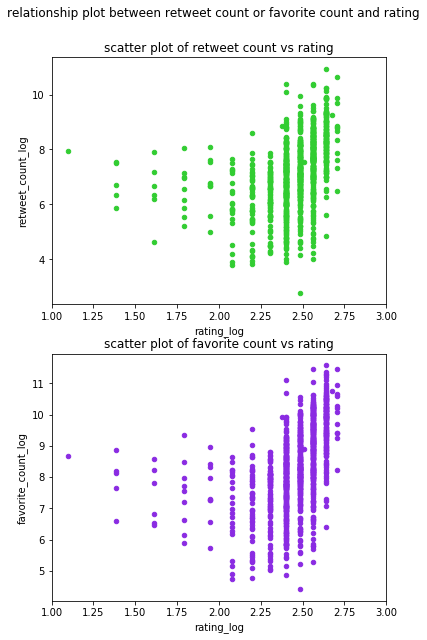

In [117]:
# 画散点图
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(2, 1, 1)
title1 = 'scatter plot of retweet count vs rating'
dog_archive_clean.plot(y='retweet_count_log', x='rating_log', kind='scatter',
                       ax=ax1, title=title1, color='#32CD32')
ax1.set_xlim(1, 3)
ax2 = fig.add_subplot(2, 1, 2)
title2 = 'scatter plot of favorite count vs rating'
dog_archive_clean.plot(x='rating_log', y='favorite_count_log', kind='scatter',
                       ax=ax2, title=title2, color='#8A2BE2')
ax2.set_xlim(1, 3)
fig.suptitle('relationship plot between retweet count or favorite count and rating', fontsize=12, y=0.95)
plt.show()

#### 结论
从散点图的趋势来看，评分越高获得更高转发和更高点赞的可能性确实更高，但是没有必然联系

#### 问题3
**转发和点赞数量与dogtionary关系**
- 是否某一dogtionary的狗转发数量更高
- 是否某一dogtionary的狗点赞数量更高

In [118]:
# 准备数据
doggo_archive.retweet_count = doggo_archive.retweet_count.astype(float)
pupper_archive.retweet_count = pupper_archive.retweet_count.astype(float)
puppo_archive.retweet_count = puppo_archive.retweet_count.astype(float)
floofer_archive.retweet_count = floofer_archive.retweet_count.astype(float)

doggo_archive.favorite_count = doggo_archive.favorite_count.astype(float)
pupper_archive.favorite_count = pupper_archive.favorite_count.astype(float)
puppo_archive.favorite_count = puppo_archive.favorite_count.astype(float)
floofer_archive.favorite_count = floofer_archive.favorite_count.astype(float)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [119]:
# 计算doggo类狗的评分描述型统计量
doggo_archive.describe()

,rating,retweet_count,favorite_count
count,62.000000,34.000000,34.000000
mean,11.838710,5350.411765,15620.500000
std,1.580553,8397.928100,18518.772406
min,5.000000,987.000000,3660.000000
25%,11.000000,1956.750000,6594.000000
50%,12.000000,2486.000000,9128.500000
75%,13.000000,3977.000000,12335.000000
max,14.000000,42045.000000,95138.000000


In [120]:
# 计算pupper类狗的评分描述型统计量
pupper_archive.describe()

,rating,retweet_count,favorite_count
count,174.000000,120.000000,120.000000
mean,10.857874,2225.783333,7022.000000
std,1.542384,2528.016332,7793.300403
min,4.000000,102.000000,687.000000
25%,10.000000,688.750000,2433.500000
50%,11.000000,1265.500000,3612.000000
75%,12.000000,2525.250000,8013.000000
max,14.000000,15743.000000,39558.000000


In [121]:
# 计算puppo类狗的评分描述型统计量
puppo_archive.describe()

,rating,retweet_count,favorite_count
count,22.000000,15.000000,15.000000
mean,12.000000,5234.000000,16755.800000
std,1.309307,6250.101108,16499.277414
min,9.000000,707.000000,3265.000000
25%,11.250000,1586.000000,6447.000000
50%,12.000000,3029.000000,10088.000000
75%,13.000000,4681.500000,18959.000000
max,14.000000,19563.000000,56199.000000


In [122]:
# 计算floofer类狗的评分描述型统计量
floofer_archive.describe()

,rating,retweet_count,favorite_count
count,8.000000,5.000000,5.000000
mean,11.875000,2513.800000,8133.600000
std,1.125992,1809.608576,6051.676156
min,10.000000,494.000000,2255.000000
25%,11.000000,1136.000000,4003.000000
50%,12.000000,2496.000000,6038.000000
75%,13.000000,3419.000000,11252.000000
max,13.000000,5024.000000,17120.000000


从描述性统计结果看：

retweet_count均值最高的是puppo,均值最低的是pupper

favorite_count均值最高的是puppo,均值最低的是pupper

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


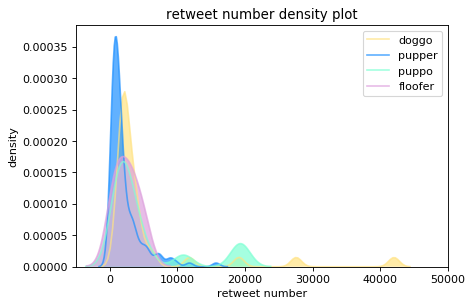

In [125]:
# 或者不同类狗狗转发数的密度图
plt.figure(figsize=(6,4), dpi= 80)
sns.kdeplot(doggo_archive.retweet_count.values, shade=True, color="#FFE384", label="doggo", alpha=.7)
sns.kdeplot(pupper_archive.retweet_count.values, shade=True, color="#1E90FF", label="pupper", alpha=.7)
sns.kdeplot(puppo_archive.retweet_count.values, shade=True, color="#7FFFD4", label="puppo", alpha=.7)
sns.kdeplot(floofer_archive.retweet_count.values, shade=True, color='#DDA0DD', label="floofer", alpha=.7)
plt.xlim(-5000, 50000)
plt.title('retweet number density plot')
plt.xlabel('retweet number')
plt.ylabel('density')
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


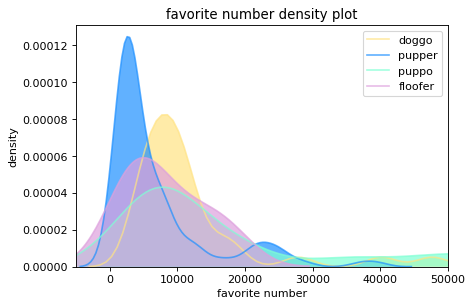

In [124]:
# 或者不同类狗狗点赞数的密度图
plt.figure(figsize=(6,4), dpi= 80)
sns.kdeplot(doggo_archive.favorite_count.values, shade=True, color="#FFE384", label="doggo", alpha=.7)
sns.kdeplot(pupper_archive.favorite_count, shade=True, color="#1E90FF", label="pupper", alpha=.7)
sns.kdeplot(puppo_archive.favorite_count, shade=True, color="#7FFFD4", label="puppo", alpha=.7)
sns.kdeplot(floofer_archive.favorite_count, shade=True, color='#DDA0DD', label="floofer", alpha=.7)
plt.xlim(-5000, 50000)
plt.title('favorite number density plot')
plt.xlabel('favorite number')
plt.ylabel('density')
plt.show()

#### 结论：
- pupper类的狗狗无论在转发量还是点赞量上，分布都比其他三类更集中，并且更低
- puppo类的狗狗的分布比较分散，但其转发量和点赞量都是偏高

#### 问题4

**转发和点赞数量的关系**
- 转发数和点赞数的关系

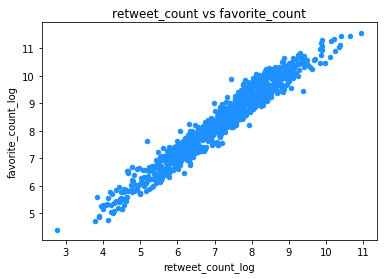

In [126]:
# 散点图查看转发数量和点赞数量是否存在关系
dog_archive_clean.plot.scatter(x='retweet_count_log', y='favorite_count_log', color='#1E90FF')
plt.title('retweet_count vs favorite_count')
plt.show()

#### 结论：

可以认为转发量和点赞量是正相关的关系，即更多的点赞量的推特同样有着更高的转发量

### 问题的回答
**评分与dogtionary**

从箱线图和密度图来看：

- puppo的分数整体都比较高，而且分布也很集中，可以得出puppo类型的狗更容易获得高评分。
- pupper的分数分布比较宽，但整体来看分布比其他三种类型的狗分数低，可以得出pupper类型的狗更容易获得低评分。

**评分与转发和点赞数量**

- 从散点图的趋势来看，评分越高获得更高转发和更高点赞的可能性确实更高，但是没有必然联系

**转发和点赞数量与dogtionary关系**

从描述统计数据和密度图来看：

- pupper类的狗狗无论在转发量还是点赞量上，分布都比其他三类更集中，并且更低
- puppo类的狗狗的分布比较分散，但其转发量和点赞量都是偏高

**转发和点赞数量的关系**

- 从散点图来看，可以认为转发量和点赞量是正相关的关系，即更多的点赞量的推特同样有着更高的转发量

## 总结：

1. 通过观察法和编程法，提出数据集中的质量和整洁度问题
2. 针对质量和整洁度问题，提出解决方案，并实施数据清理
3. 提出数据分析问题，利用清理后的数据完成数据分析问题的回答